## First analisys

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing as pr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [2]:
df = pd.read_csv('datasets/breast-cancer-wisconsin.data')
df.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [3]:
print(df.dtypes)
df.info()

1000025     int64
5           int64
1           int64
1.1         int64
1.2         int64
2           int64
1.3        object
3           int64
1.4         int64
1.5         int64
2.1         int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   1000025  698 non-null    int64 
 1   5        698 non-null    int64 
 2   1        698 non-null    int64 
 3   1.1      698 non-null    int64 
 4   1.2      698 non-null    int64 
 5   2        698 non-null    int64 
 6   1.3      698 non-null    object
 7   3        698 non-null    int64 
 8   1.4      698 non-null    int64 
 9   1.5      698 non-null    int64 
 10  2.1      698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [4]:
df.describe()

,1000025,5,1,1.1,1.2,2,3,1.4,1.5,2.1
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,3.438395,2.869628,1.590258,2.690544
std,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,2.440056,3.055004,1.716162,0.951596
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [5]:
df.corr()

,1000025,5,1,1.1,1.2,2,3,1.4,1.5,2.1
1000025,1.000000,-0.055276,-0.041735,-0.041717,-0.065003,-0.045630,-0.060082,-0.052188,-0.034961,-0.080378
5,-0.055276,1.000000,0.645366,0.655089,0.486699,0.522108,0.558511,0.536176,0.350176,0.716509
1,-0.041735,0.645366,1.000000,0.906814,0.705397,0.751674,0.755824,0.722699,0.458548,0.817772
1.1,-0.041717,0.655089,0.906814,1.000000,0.682871,0.719524,0.736066,0.719272,0.438756,0.818794
1.2,-0.065003,0.486699,0.705397,0.682871,1.000000,0.599402,0.666759,0.603132,0.417476,0.696605
2,-0.045630,0.522108,0.751674,0.719524,0.599402,1.000000,0.616108,0.628704,0.478975,0.682618
3,-0.060082,0.558511,0.755824,0.736066,0.666759,0.616108,1.000000,0.665914,0.344118,0.756732
1.4,-0.052188,0.536176,0.722699,0.719272,0.603132,0.628704,0.665914,1.000000,0.428185,0.712067
1.5,-0.034961,0.350176,0.458548,0.438756,0.417476,0.478975,0.344118,0.428185,1.000000,0.423008
2.1,-0.080378,0.716509,0.817772,0.818794,0.696605,0.682618,0.756732,0.712067,0.423008,1.000000


In [6]:
corr_ = df.corr()

<AxesSubplot:>

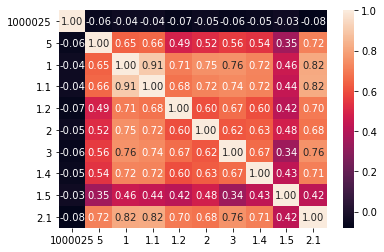

In [10]:
sns.heatmap(corr_, annot=True, fmt='.2f')

In [8]:
CorField = []
for i in corr_:
    for j in corr_.index[corr_[i] > 0.7]:
        if i != j and j not in CorField and i not in CorField:
            CorField.append(j)
            print (i,j, corr_[i][corr_.index==j].values[0])

5 2.1 0.7165085190765071
1 1.1 0.9068136687904309
1 1.2 0.7053969744849616
1 2 0.751674461765537
1 3 0.7558236148428459
1 1.4 0.7226987041005679


In [9]:
corr_ = df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()
corr_

KeyError: "None of [Index(['bore', 'stroke', 'compression-ratio', 'horsepower'], dtype='object')] are in the [columns]"

In [ ]:
sns.regplot(x='engine-size', y='price', data=df)
plt.ylim(0,)

In [ ]:
sns.regplot(x='highway-mpg', y='price', data=df)

In [ ]:
df[['highway-mpg', 'price']].corr()

In [ ]:
sns.regplot(x='peak-rpm', y='price', data=df)

In [ ]:
df[['peak-rpm', 'price']].corr()

In [ ]:
sns.regplot(x='stroke', y='price', data=df)

In [ ]:
df[['stroke', 'price']].corr()

In [ ]:
sns.boxplot(x='body-style', y='price', data=df)

In [ ]:
sns.boxplot(x='engine-location', y='price', data=df)

In [ ]:
sns.boxplot(x='drive-wheels', y='price', data=df)

In [ ]:
df.describe()

In [ ]:
df.describe(include='object')

In [ ]:
df['drive-wheels'].value_counts().to_frame()

In [ ]:
drive_wheel_counts = df['drive-wheels'].value_counts().to_frame()

In [ ]:
drive_wheel_counts

In [ ]:
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-localtion': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

In [ ]:
df['drive-wheels'].unique()

In [ ]:
df_group_one = df[['drive-wheels', 'body-style', 'price']]

In [ ]:
df_group_one = df_group_one.groupby(['drive-wheels'], as_index=False).mean()
df_group_one

In [ ]:
df_gptest = df[['drive-wheels', 'body-style', 'price']]
grouped_test1 = df_gptest.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
grouped_test1

In [ ]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels', columns='body-style')
grouped_pivot

In [ ]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

In [ ]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [ ]:
sns.heatmap(grouped_pivot, annot=True, fmt='.2f')

In [ ]:
df.corr()

In [ ]:
cols = ['wheel-base', 'horsepower', 'length', 'width', 'curb-weight', 'engine-size', 'bore', 'city-mpg', 'highway-mpg']
for col in cols:
    pearson_coef, p_value = stats.pearsonr(df[col], df['price'])
    print(f'PearsonR между {col} и price {pearson_coef} c Р-значением Р={p_value}')
    
    if p_value < 0.001:
        print(f'Корреляция между {col} и price статистически значимая')
    elif p_value < 0.05:
        print(f'Корреляция между {col} и price средняя')
    elif p_value < 0.1:
        print(f'Корреляция между {col} и price слабая')
    
    if pearson_coef > 0:
        if pearson_coef > 0.85:
            print(f'Коэффициент ~{pearson_coef} показывает положительную очень сильную связь\n')
        elif pearson_coef > 0.75:
            print(f'Коэффициент ~{pearson_coef} показывает положительную достаточно сильную связь\n')
        elif pearson_coef > 0.60:
            print(f'Коэффициент ~{pearson_coef} показывает положительную относительно сильную связь\n')
        elif pearson_coef > 0.50:
            print(f'Коэффициент ~{pearson_coef} показывает положительную среднюю сильную связь\n')
        else:
            print(f'Коэффициент ~{pearson_coef} показывает положительную слабую связь')
    else:
        if abs(pearson_coef) > 0.85:
            print(f'Коэффициент ~{pearson_coef} показывает негативную очень сильную связь\n')
        elif abs(pearson_coef) > 0.75:
            print(f'Коэффициент ~{pearson_coef} показывает негативную достаточно сильную связь\n')
        elif abs(pearson_coef) > 0.60:
            print(f'Коэффициент ~{pearson_coef} показывает негативную относительно сильную связь\n')
        elif abs(pearson_coef) > 0.50:
            print(f'Коэффициент ~{pearson_coef} показывает положительную среднюю сильную связь\n')
        else:
            print(f'Коэффициент ~{pearson_coef} показывает положительную слабую связь')

In [ ]:
grouped_test2 = df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

In [ ]:
df_gptest

In [ ]:
grouped_test2.get_group('4wd')['price']

In [ ]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'],
                              grouped_test2.get_group('rwd')['price'],
                              grouped_test2.get_group('4wd')['price'])
print(f'ANOVA results: F= {f_val}, P= {p_val}')

In [ ]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])
print(f'ANOVA results: F= {f_val}, P= {p_val}')

In [ ]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])
print(f'ANOVA results: F= {f_val}, P= {p_val}')

In [ ]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])
print(f'ANOVA results: F= {f_val}, P= {p_val}')

## Preprocessing by sklearn

In [ ]:
class MultiColumnLabelEncoder:
    def __init__(self, columns=None):
        self.columns = columns
            
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = pr.LabelEncoder().fit_transform(output[col].astype(str))
        else:
            for colname, col in output.iteritems():
                output[colname] = pr.LabelEncoder().fit_transform(col.astype(str))
        return output
    
    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

In [ ]:
df.info()

In [ ]:
df = MultiColumnLabelEncoder(columns=['make', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system', 'horsepower-binned']).fit_transform(df)
df

In [ ]:
df = df.fillna(0)

In [ ]:
y = df.price

In [ ]:
X = df.drop('price', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(X_train, y_train)

In [ ]:
print(regr.feature_importances_)

In [ ]:
df.drop('price', axis=1)

In [ ]:
importances = list(zip(regr.feature_importances_, df.columns))
importances.sort(reverse=True)

In [ ]:
importances